In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [36]:
titanik = pd.read_csv('train.csv', sep=',')

titanik.head(4)
#titanik.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [37]:
titanik.loc[titanik['Sex'] == 'female', 'Sex'] = 1
titanik.loc[titanik['Sex'] == 'male', 'Sex'] = 0
#
titanik['Age'].fillna(value=titanik['Age'].mean(), inplace=True)
titanik['Pclass'].mask(titanik['Pclass'] == 2 , 1, inplace=True)
titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [38]:
# OPTION 2
# For EDA you may want to split the original dataframe, and assign X and y later
titanik_train, titanik_test = train_test_split(titanik, test_size=0.2, random_state=42)

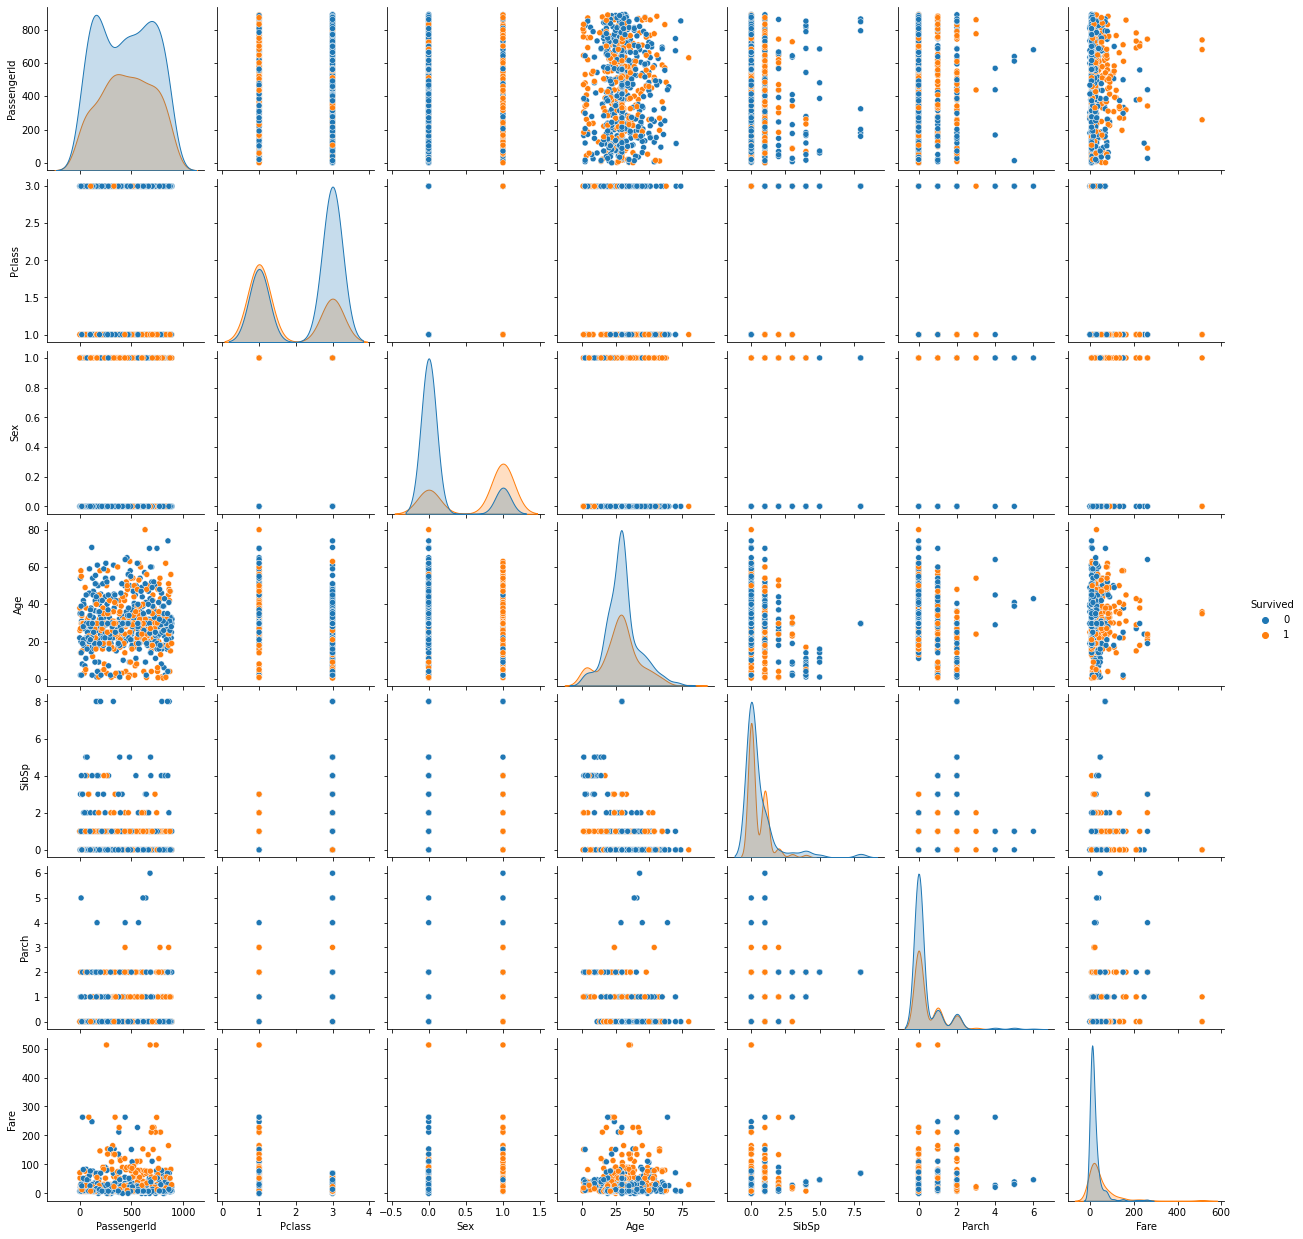

In [39]:
sns.pairplot(titanik_train, hue = 'Survived')

In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
X = titanik_train[['Sex', 'Age']]
y = titanik_train['Survived']

In [42]:
m = LogisticRegression()    # create the model
m.fit(X, y)                 # train the model -> find best coefficients

m.coef_

array([[ 2.4243015 , -0.00243679]])

In [43]:
# calculate the accuracy
m.score(X, y)

0.7879213483146067

In [44]:
ypred = m.predict(X)   # prediction for the same data points

In [45]:
ypred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 891 and the vector passed to `hue` has length 712.

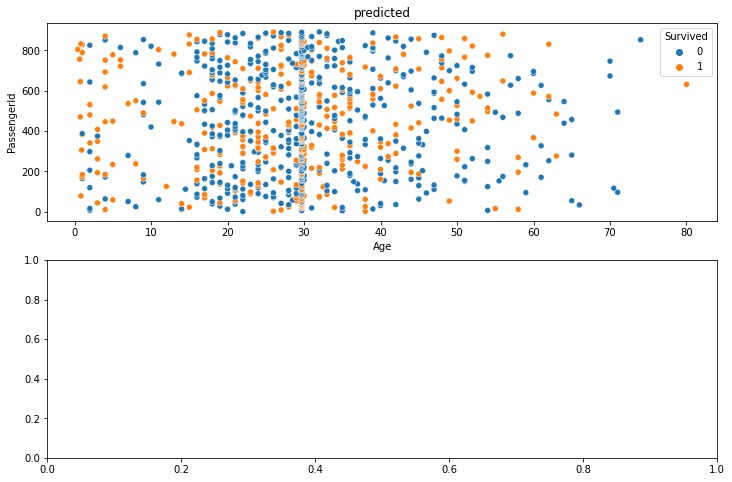

In [34]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title('true')
sns.scatterplot(x='Age', y='PassengerId', hue='Survived', data=titanik)
plt.title('predicted')
plt.subplot(2,1,2)
sns.scatterplot(x='Age', y='PassengerId', hue=ypred, data=titanik)